In [2]:
# Plot the computer vs non-computer related jobs average salary based on the years of experience

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# control font
sns.set_context('talk')

df = pd.read_csv('./survey_results_public.csv')
pd.set_option("max_columns", None)
df.head(5)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [4]:
# get usa data frame
dfUSA = df.loc[df['Country']=="United States",  ['Salary', 'HomeRemote','CompanyType','YearsProgram', 'FormalEducation','EmploymentStatus','MajorUndergrad']]
dfUSA = dfUSA.dropna()
dfUSA.head()

,Salary,HomeRemote,CompanyType,YearsProgram,FormalEducation,EmploymentStatus,MajorUndergrad
17,130000.0,All or almost all the time (I'm full-time remote),Publicly-traded corporation,20 or more years,Bachelor's degree,Employed full-time,Computer science or software engineering
18,82500.0,A few days each month,Publicly-traded corporation,2 to 3 years,Bachelor's degree,Employed full-time,Computer science or software engineering
25,175000.0,"Less than half the time, but at least one day ...",Publicly-traded corporation,20 or more years,Master's degree,Employed full-time,Computer science or software engineering
70,65000.0,A few days each month,"Privately-held limited company, not in startup...",2 to 3 years,Some college/university study without earning ...,Employed full-time,"Information technology, networking, or system ..."
72,120000.0,All or almost all the time (I'm full-time remote),Venture-funded startup,20 or more years,Some college/university study without earning ...,Employed full-time,Computer science or software engineering


# Computer vs non-computer related salaries


In [5]:

# for each row, transform MajorUndergrad to computer or non-computer
def isComputerRelated(row):
    value = row["MajorUndergrad"].lower()
    return "Computer" if value.find("computer") > -1  else "Non-Computer"

# transformed the yearsProgram to a numeric series to allow for sorting
def setExperienceOrder(row):
    value = row["YearsProgram"][0:2].lower().strip()
    return 0 if value.find("le") > -1  else int(value)

dfCompRelated = dfUSA[["Salary","MajorUndergrad", "YearsProgram"]].copy()
dfCompRelated["ComputerRelated"] = dfCompRelated.apply(isComputerRelated, axis=1)  # add the computer related column

# group by yearsprogram and computer related. By default, the new column is index. remove the index.
# Also move the computer related rows to column (unstack) 
compRelAvg = dfCompRelated.groupby(["YearsProgram","ComputerRelated"], as_index=True)['Salary'].mean().unstack().reset_index()
compRelAvg["ExperienceOrder"] = compRelAvg.apply(setExperienceOrder, axis=1)  
compRelAvg = compRelAvg.sort_values(by='ExperienceOrder', ascending=True)
compRelAvg.head()



ComputerRelated,YearsProgram,Computer,Non-Computer,ExperienceOrder
20,Less than a year,82000.000000,56937.500000,0
0,1 to 2 years,72658.333333,71719.148936,1
11,2 to 3 years,63620.444444,72001.000000,2
13,3 to 4 years,66546.580808,79059.382716,3
14,4 to 5 years,70649.715447,76375.324675,4


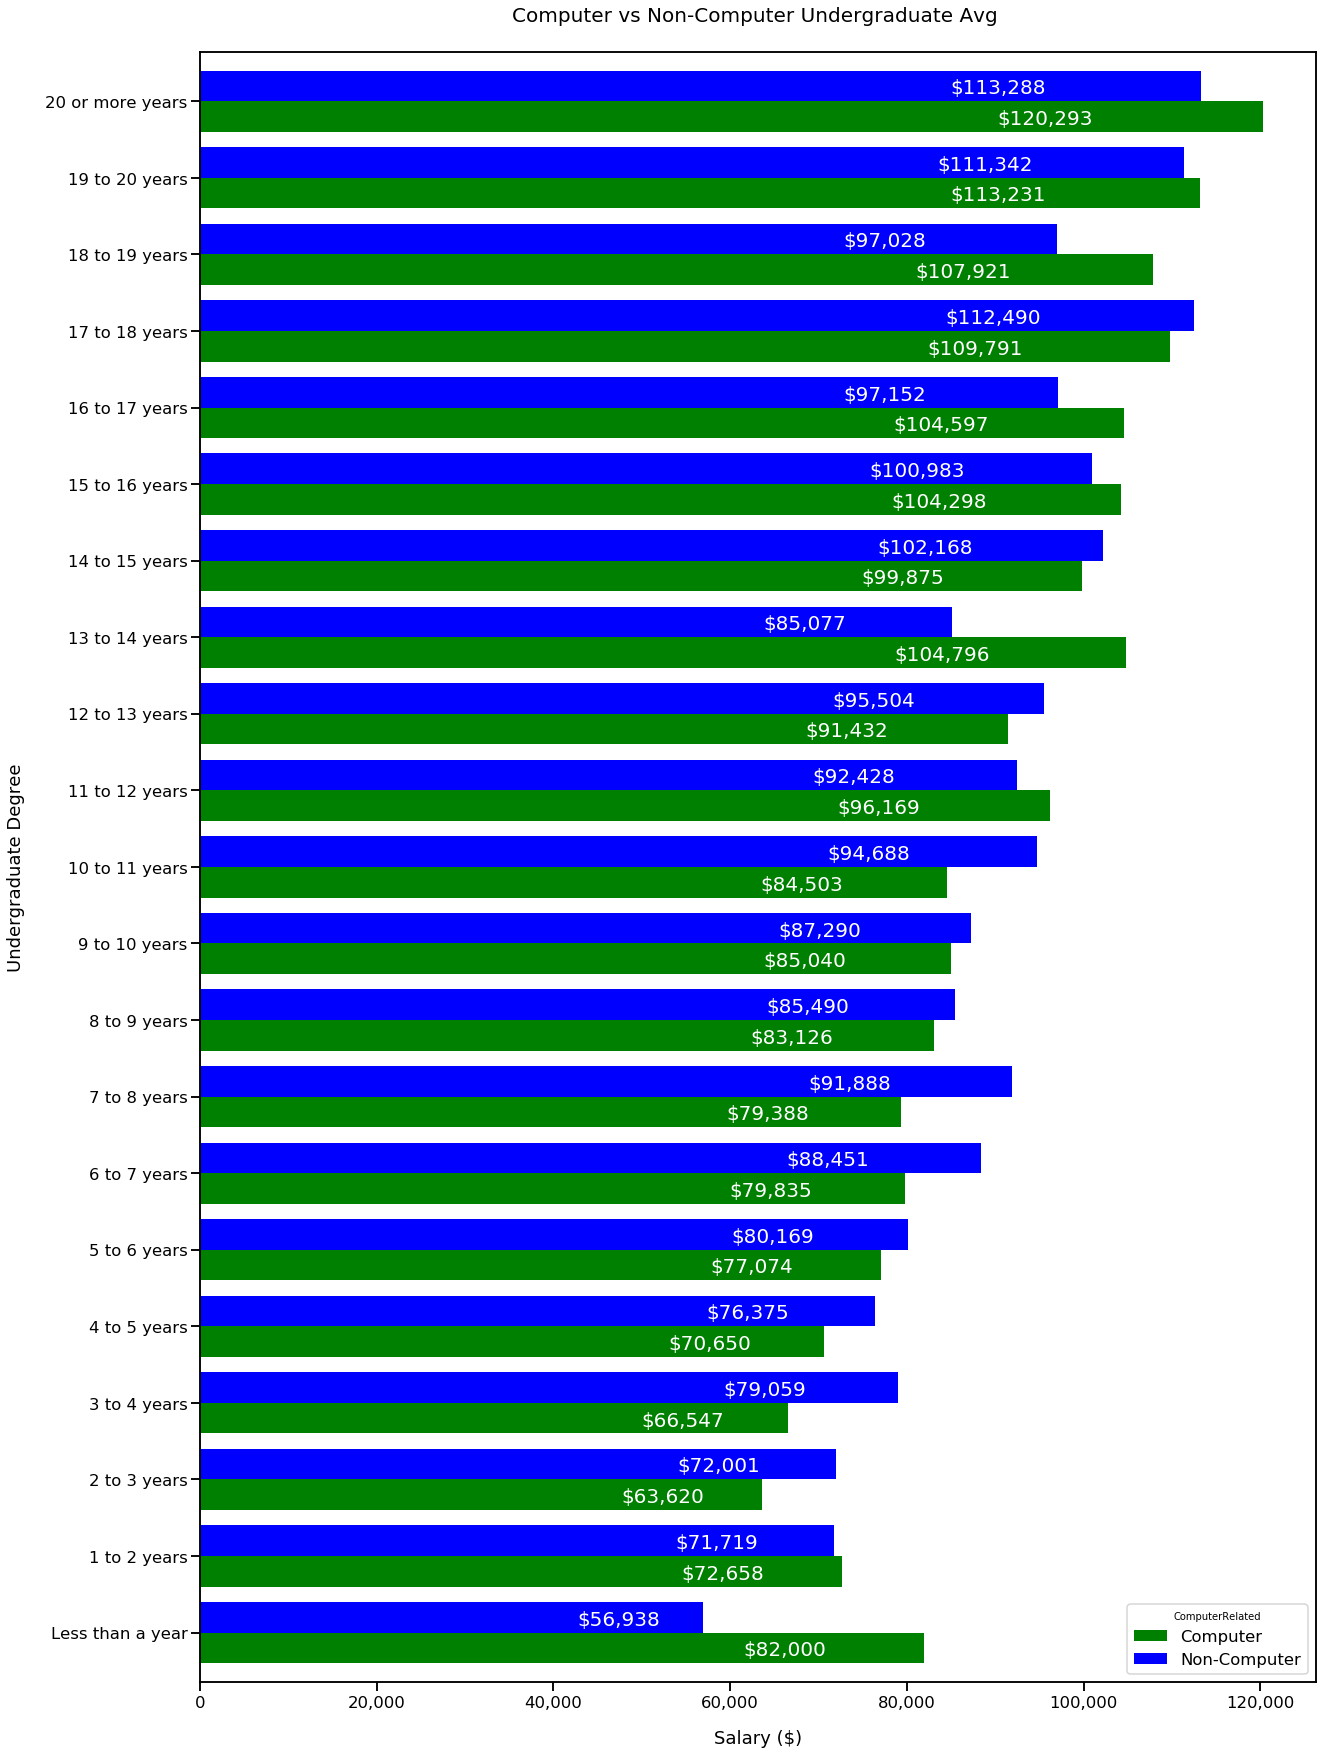

In [11]:
# horizontal bar chart with colors
plot = compRelAvg.plot(kind='barh',x="YearsProgram",y=['Computer','Non-Computer'],figsize=(20, 30), color=['g','b'], width=.8)

# set the axis and title labels
plot.set_ylabel('Undergraduate Degree', labelpad=20)
plot.set_xlabel('Salary ($)', labelpad=20)
plot.set_title('Computer vs Non-Computer Undergraduate Avg ', pad=30, fontsize=20)
plot.set_xticklabels(['{:,.0f}'.format(v) for v in plot.get_xticks()])  # format the x series

# annotate the bars with the total amount
for p in plot.patches:
    b = p.get_bbox()        
    value = "${:,.0f}".format(b.x1)
    # plot.annotate(str(value), (b.x1, b.y1 + -.2 ), fontsize=20)
    plot.text(b.x1 * .75, p.get_y() + .1 ,str(value), fontsize=20, color='#ffffff')   # add a value at the end of the bar

#plot.get_figure().savefig("ozkary-barh-years-experience.png", dpi=300)
